#### Aplicaremos lo aprendido de graficar usando matplotlib 

In [14]:
#Importar las librerias que vamos a ocupar
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [15]:
os.chdir(r'C:\Users\monti.UNITY12\OneDrive\Documentos\CienciaDatos')

#Leer el archivo de excel
df = pd.read_excel('informe.xlsx', engine='openpyxl')
df.head(2)

,NUMERO FACTURA CLIENTE,CONCEPTO,CLIENTE,PROVINCIA,SECTOR,IMPORTE CLIENTE,FECHA FACTURA CLIENTE,PAGADA CLIENTE,PROVEEDOR,ZONA,TIPO,IMPORTE PROVEEDOR
0,1,NaN,CLIENTE-0004,MADRID,CONSTRUCCION,1200,2019-07-31,SI,PROV-005,ZONA 2,INTERNO,540.0
1,2,PROYECTO,CLIENTE-0005,BARCELONA,METAL,800,2021-06-02,SI,PROV-003,ZONA 2,INTERNO,360.0


In [16]:
#Ver el tipo de datos de cada columna
df.dtypes

NUMERO FACTURA CLIENTE             int64
CONCEPTO                          object
CLIENTE                           object
PROVINCIA                         object
SECTOR                            object
IMPORTE CLIENTE                    int64
FECHA FACTURA CLIENTE     datetime64[ns]
PAGADA CLIENTE                    object
PROVEEDOR                         object
ZONA                              object
TIPO                              object
IMPORTE PROVEEDOR                float64
dtype: object

In [17]:
#Eliminar datos nulos
df.dropna(inplace=True)
df.head(3)

,NUMERO FACTURA CLIENTE,CONCEPTO,CLIENTE,PROVINCIA,SECTOR,IMPORTE CLIENTE,FECHA FACTURA CLIENTE,PAGADA CLIENTE,PROVEEDOR,ZONA,TIPO,IMPORTE PROVEEDOR
1,2,PROYECTO,CLIENTE-0005,BARCELONA,METAL,800,2021-06-02,SI,PROV-003,ZONA 2,INTERNO,360.0
2,3,EQUIPOS,CLIENTE-0006,BARCELONA,BANCA,750,2020-04-13,SI,PROV-005,ZONA 2,INTERNO,337.5
3,4,PROGRAMA,CLIENTE-0007,BARCELONA,BANCA,4500,2020-03-19,SI,PROV-005,ZONA 2,INTERNO,2025.0


In [18]:
#Contar los elementos null
df.isnull().sum()

NUMERO FACTURA CLIENTE    0
CONCEPTO                  0
CLIENTE                   0
PROVINCIA                 0
SECTOR                    0
IMPORTE CLIENTE           0
FECHA FACTURA CLIENTE     0
PAGADA CLIENTE            0
PROVEEDOR                 0
ZONA                      0
TIPO                      0
IMPORTE PROVEEDOR         0
dtype: int64

In [19]:
#Crear mi primera tabla dinamica
tabla1 = pd.pivot_table(df, index='CONCEPTO', values=['IMPORTE CLIENTE','IMPORTE PROVEEDOR'], aggfunc='sum')
tabla1

,IMPORTE CLIENTE,IMPORTE PROVEEDOR
CONCEPTO,,
CONSULTORIA,220150,70375.0
DESARROLLO,226910,76014.5
EQUIPOS,216020,72430.0
FORMACION,153530,47906.5
PROGRAMA,139130,46987.5
PROYECTO,215650,73589.5


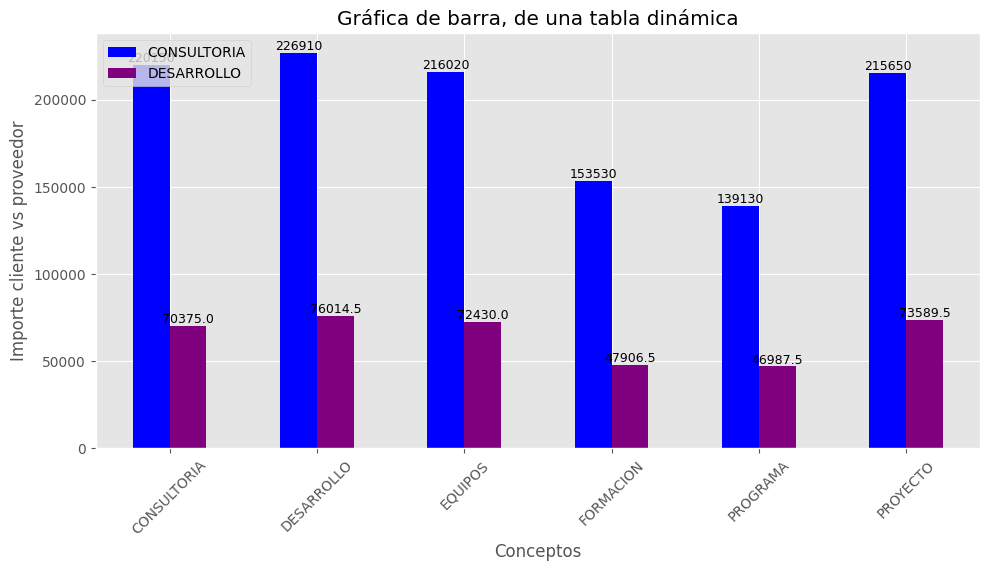

"Parámetros útiles:\nfmt='%.2f' → formato de número (2 decimales).\nlabel_type='edge' → muestra arriba de la barra (puede ser 'center').\npadding=3 → separación entre etiqueta y barra."

In [43]:
ax = tabla1.plot(kind='bar', figsize=(10,6), color=['b', 'purple'])

plt.legend(tabla1.index, loc='upper left')
plt.xlabel('Conceptos')
plt.ylabel('Importe cliente vs proveedor')
plt.title('Gráfica de barra, de una tabla dinámica')
plt.grid(True)
plt.tight_layout() 
plt.xticks(rotation=45)

# 🔹 Agregar etiquetas manualmente
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.5,
            str(round(p.get_height(),2)),
            ha='center', va='bottom', fontsize=9)

plt.show()


"""Parámetros útiles:
fmt='%.2f' → formato de número (2 decimales).
label_type='edge' → muestra arriba de la barra (puede ser 'center').
padding=3 → separación entre etiqueta y barra."""


In [21]:
#Crear segunda tabla dinamica, de importe cliento por sector
tabla2 = pd.pivot_table(df, index='SECTOR', values='IMPORTE CLIENTE', aggfunc='sum')
tabla2

,IMPORTE CLIENTE
SECTOR,
BANCA,385310
CONSTRUCCION,328900
METAL,457180


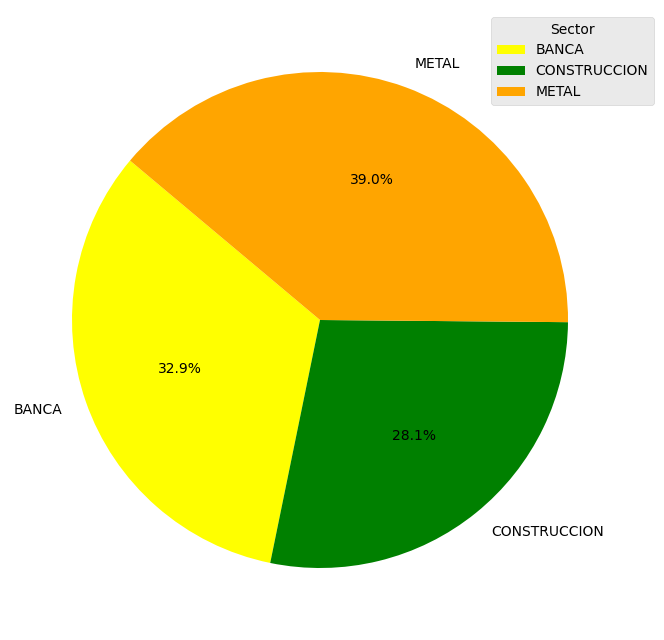

In [22]:
#Graficarlo en una grafica de pastel
plt.figure(figsize=(8, 9))
plt.pie(tabla2['IMPORTE CLIENTE'], labels=tabla2.index, startangle=140, autopct='%1.1f%%', colors=['yellow','g','orange'])
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1) , loc='upper right')
plt.show()

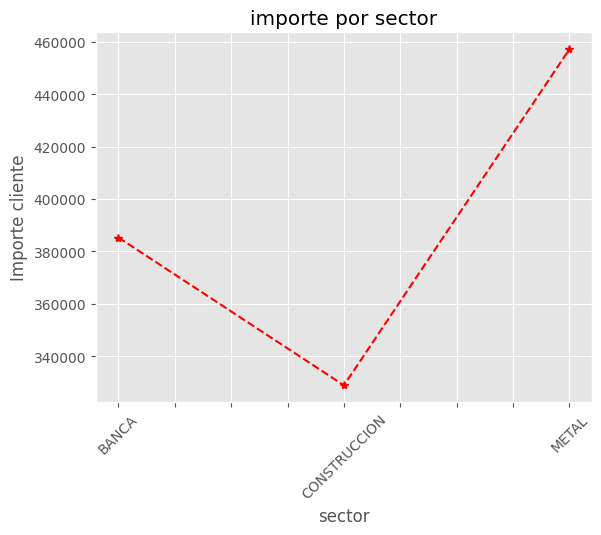

In [23]:
#Crear una grafica de linea
#plt.Figure(física=(12, 20))
tabla2.plot(marker='*', linestyle= '--', color='red', legend=False)
plt.title('importe por sector')
plt.ylabel('Importe cliente')
plt.xlabel('sector')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


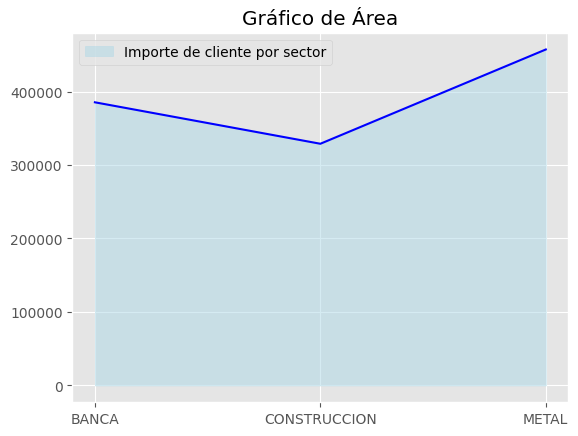

In [28]:
#Crear una grafica de area
plt.fill_between(tabla2.index,tabla2['IMPORTE CLIENTE'], color="lightblue", alpha=0.5, label="Importe de cliente por sector")
plt.plot(tabla2.index,tabla2['IMPORTE CLIENTE'],color="blue")
plt.title("Gráfico de Área")
plt.style.use('ggplot')  # estilo tipo ggplot
plt.legend()
plt.show()


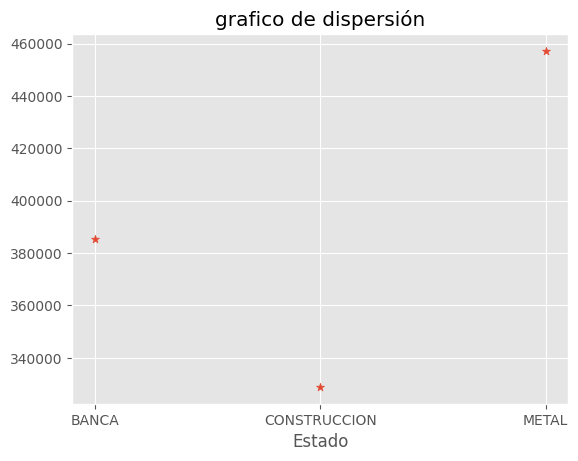

In [47]:
#Grafica de dispersión
plt.scatter(tabla2.index,tabla2['IMPORTE CLIENTE'], marker='*')
plt.title('grafico de dispersión')
plt.xlabel('Estado')
plt.show()


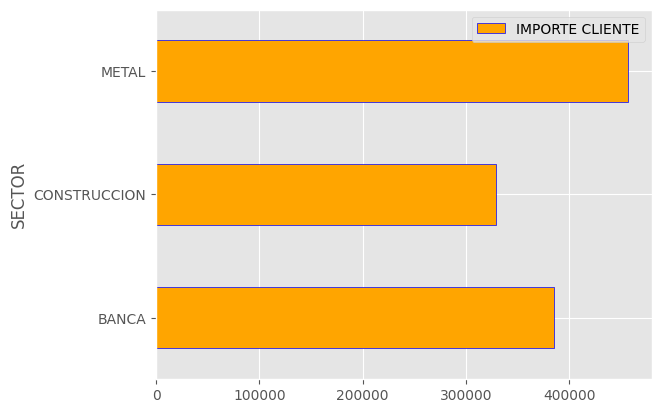

In [26]:
#   Grafica horizontal
tabla2.plot(kind='barh', color="orange", edgecolor='blue')
plt.show()

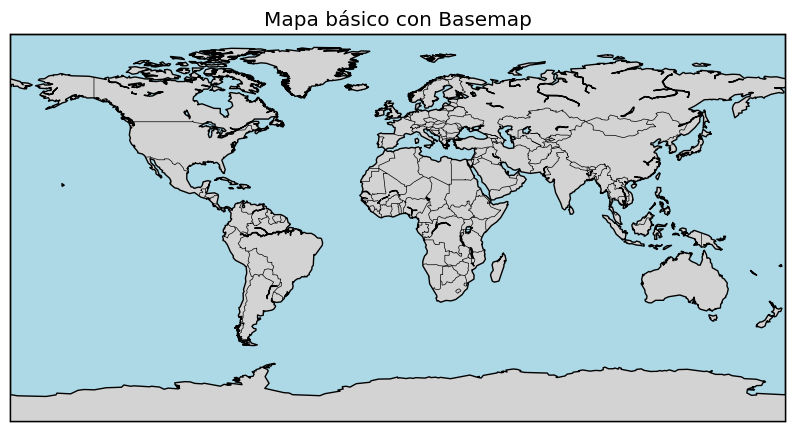

In [48]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear mapa global
m = Basemap(projection="cyl", resolution="c")
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color="lightgray", lake_color="lightblue")
m.drawmapboundary(fill_color="lightblue")

plt.title("Mapa básico con Basemap")
plt.show()


np.int64(1171390)